<a href="https://colab.research.google.com/github/tanphat2008/AI/blob/main/fullanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 877.4 kB/s eta 0:00:00


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_generator = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.1,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [5]:
trainset='/content/drive/MyDrive/baitapai/archive1111/flowers/'

In [6]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 1551 images belonging to 11 classes.
Found 167 images belonging to 11 classes.


In [7]:
validation_set.class_indices

{'astilbe': 0,
 'black_eyed_susan': 1,
 'california_poppy': 2,
 'common_daisy': 3,
 'coreopsis': 4,
 'dandelion': 5,
 'gloriosa': 6,
 'hoathiendieu': 7,
 'iris': 8,
 'rose': 9,
 'sunflower': 10}

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
13/13 [==============================] - 1153s 87s/step - loss: 2.2794 - accuracy: 0.5397 - val_loss: 2.2537 - val_accuracy: 0.6048
Epoch 2/50
13/13 [==============================] - 9s 657ms/step - loss: 1.8974 - accuracy: 0.5880 - val_loss: 1.5455 - val_accuracy: 0.6048
Epoch 3/50
13/13 [==============================] - 10s 747ms/step - loss: 1.5556 - accuracy: 0.5880 - val_loss: 1.3911 - val_accuracy: 0.6048
Epoch 4/50
13/13 [==============================] - 10s 749ms/step - loss: 1.4616 - accuracy: 0.5880 - val_loss: 1.2885 - val_accuracy: 0.6048
Epoch 5/50
13/13 [==============================] - 9s 647ms/step - loss: 1.3566 - accuracy: 0.5899 - val_loss: 1.1956 - val_accuracy: 0.6527
Epoch 6/50
13/13 [==============================] - 9s 659ms/step - loss: 1.2389 - accuracy: 0.6454 - val_loss: 1.0808 - val_accuracy: 0.6587
Epoch 7/50
13/13 [==============================] - 10s 750ms/step - loss: 1.1287 - accuracy: 0.6441 - val_loss: 1.0747 - val_accuracy: 0.6587
Ep

In [10]:
model.save('/drive/MyDrive/fullanh1.h5')

In [11]:
model.save('fullanh1.h5')

In [12]:
model1=load_model('/drive/MyDrive/fullanh1.h5')

In [13]:
label = ['astilbe','black_eyed_susan','california_poppy','common_daisy','coreopsis','dandelion','gloriosa','hoathiendieu','iris','rose','sunflower']

1/1 [==============================] - 1s 521ms/step
sunflower


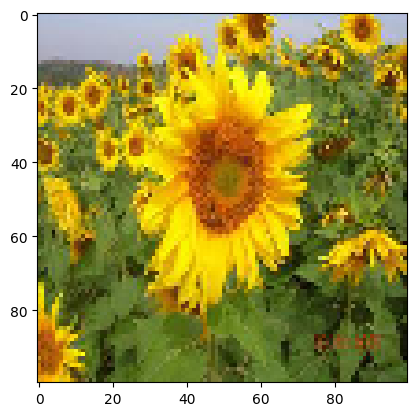

In [14]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/baitapai/archive1111/flowers/sunflower/5528601_b7a824d447_c.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 19ms/step
rose


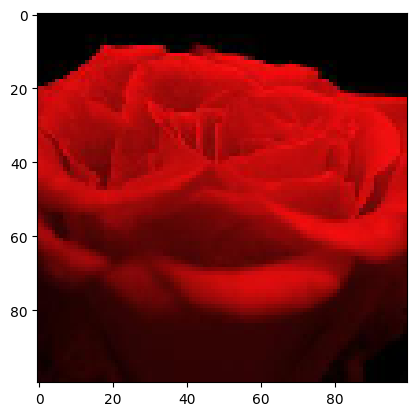

In [15]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/baitapai/archive1111/flowers/rose/rose (1).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 19ms/step
hoathiendieu


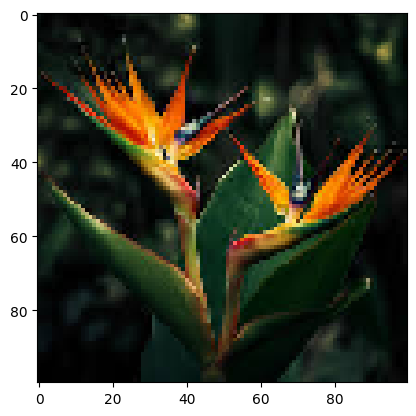

In [16]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/baitapai/archive1111/flowers/hoathiendieu/hoathiendieu (3).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])